# Computational Theory Project: Countdown

In this project, we explore the numbers round of the popular TV programme Countdown. 

# Table of Contents

1. [Introduction](#Introduction)
   - [Objective of the Assignment](#Objective-of-the-Assignment)
   - [Overview of the Countdown Numbers Game](#Overview-of-the-Countdown-Numbers-Game)
2. [Problem Statement](#Problem-Statement)
   - [Detailed Description of the Game Rules](#Detailed-Description-of-the-Game-Rules)
   - [Strategic Considerations and Perceived Biases](#Strategic-Considerations-and-Perceived-Biases)
      - [Biases](#Biases)
3. [Approach and Methodology](#Approach-and-Methodology)
   - [Translating Countdown to a Programme](#Translating-Countdown-to-a-Programme)
      - [Input Parameters](#Input-params)
      - [Game Rules](#Game-rules)
      - [Output](#Output)
   - [Functional Programming](#Functional-Programming)
      - [Immutability](#Immutability)
      - [Higher-order Functions](#Higher-order-Functions)
      - [Practical Usage](#Practical-usage)
   - [Reverse Polish Notation](#Reverse-Polish-Notation)
      - [Benefits](#Benefits)
      - [Infix Notation vs Reverse Polish Notation](Infix-Notation-vs-Reverse-Polish-Notation)
   - [Algorithm Design](#Algorithm-Design)
      - [Optimization](#Optimization)
4. [Implementation](#Implementation)
   - [Constructing the Function](#Constructing-the-Function)
   - [`solve_numbers` Function](#solve_numbers-Function)
   - [Completed Code Block](#Completed-Code-Block)
5. [Analysis](#Analysis)
   - [Evaluation of the Solution](#Evaluation-of-the-Solution)
   - [Visualizations and Examples](#Visualizations-and-Examples)
6. [Conclusion](#Conclusion)
7. [References](#References)


# Introduction
***
The Countdown numbers game is a mathematical component of the popular television programme *Countdown*. In the numbers round of the show, the contestants are tasked to use arithmetic operations to reach a specified target number. The contestants are given six randomly selected numbers, with which they can add, subtract, divide and multiply to achieve this. While the goal of the game is relatively simple, the game introduces a varying set of circumstances which results in a unique game for each respective set of contestants.

## Objective of the Assignment
The objective of the assignment is to enhance our computational thinking skills by engaging with a problem which mirrors the comlpexity and unpredictability of real world scenarios. The main objectives of the assignment can be categorized as follows, as per the assignment brief:

1. **Identify difficult computational problems in everyday computing:** Using the Countdown numbers game, we can explore how seemingly relatively simple concepts can unfold into complex computational challenges, requiring specific considerations and critical thinking.

2. **Define the common models of computation:** We will investigate the common models of computation behind the Countdown numbers game. This process will include understanding the principles of the common models of computation, ensuring this understanding will guide us to developing a consistent and acceptable solution.

3. **Design computer programs using a variety of computational paradigms:** The assignment will evolve around the use of a specific function, `solve_numbers`, which will take a variety of computational paradigms, building upon the basis of our understanding of the common models of computation. This function will seek to solve the numbers game challenge, while providing a flexible and practical experience based on our needs.

4. **Analyse the complexity of an algorithm:** An important part of the assignment is to analyze and evaluate the efficiency and complexity of our solution. This proces involves thoroughly investigating each component of our solution, ensuring that it meets expectations.

We will thoroughly investigate the Countdown numbers game, analyzing its constraints and rules, to implement a thorough solution. The `solve_numbers` function, implemented through Python and its mathematical frameworks, will utilize computational paradigms while building upon the common models of computation to solve the problem of the numbers game efficiently.

## Overview of the Countdown Numbers Game
The numbers game begins with the selection of the six numbers, which is made up of two different sets of numbers. **Large** numbers, which are made up of one copy of 25, 50, 75 and 100, and **small** numbers which are made up of two sets of the numbers 1-10. The contestant then is able to choose a combination of these numbers, by first selecting between one and four large numbers, with the remaining numbers being made up of the numbers of the 1-10 set. A target number is then generated, with this number being between 101 and 999 inclusive. Contestants are then given 30 seconds to use addition, subtraction, division and multiplication to reach the target number using using any combination of the six chosen numbers. Each of the numbers can only be utilized once in the calculation, ensuring that the number remains a whole number at each step.

# Problem Statement
***

## Detailed Description of the Game Rules
The Countdown numbers game rules are relatively straightforward, but it's important to give a detailed explanation of the rules so we thoroughly understand the objective we are attempting to achieve. At its core, the numbers game challenges contestants to reach a specified target number from a set of six chosen numbers, using mathematical calculations. 

#### Numbers Section
Participants select six numbers from a set pool, which is defined as follows:

- **Small Numbers**: Two sets of the numbers 1 to 10, which means that each of these numbers appear twice. 
- **Large Numbers**: One set of the larger numbers - 25, 50, 75 and 100, which means that each of these numbers appear once.

Below is a table which shows this:

In [1]:
import pandas as pd

# Data for the table
data = {
    "Number Type": ["Small", "Large"],
    "Numbers Available": ["1, 2, 3, 4, 5, 6, 7, 8, 9, 10", "25, 50, 75, 100"],
    "Quantity in Pool": ["2 of each", "1 of each"]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame as a table
df


,Number Type,Numbers Available,Quantity in Pool
0,Small,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10",2 of each
1,Large,"25, 50, 75, 100",1 of each


At the start of each round, contestants must select a total of six numbers from these pools. The standard format allows contestants to choose any combination of small and large numbers. The composition of the numbers that the contestant chooses is of their own volition, and is a strategic step of the game, as the choice impacts the mathematical operations that they can use. 

#### Example Selections:
- **All Small Numbers**: 2, 5, 7, 1, 4, 3
- **Mixed Numbers**: 5, 2, 4, 25, 50, 100
- **Heavy Large Numbers**: 25, 50, 75, 100, 3, 5

After selecting six numbers, a random target number is generated between 101 and 999 inclusive. This number represents the goal that contestants must reach using the given selected numbers. Contestants are given 30 seconds to reach the target number using mathematical operations such as **addition**, **subtraction**, **multiplication**, and **division**. However, there are some restrictions on how contestants can utilize the operations. These can be defined as follows:

- **Division**: Division can only be used when the result is a whole number. At no stage can there be a negative number in the caclulation process. 
- **Subtraction**: Subtraction can only be used when it results in a positive number. At no stage in the calculation process can there be a negative number.
- **Usage**: While there is no limit on the number of times a mathematical operation can be used, each of the six chosen numbers can only be used once during the calculation.

With these considerations in mind, we can better understand how to construct the `solve_numbers` function for our needs. 

## Strategic Considerations and Perceived Biases
The selection of these numbers also introduces complex strategic considerations. Each respective player may have a different approach to choosing numbers based on their own stregth and familiarity with the game. For example, a specific player might feel that they are more comfortable with an emphasis on small numbers, as it provides more control over incremental or minute adjustments to the number, while another player may rely on large numbers as it is more straightforward to reach large numbers. Each approach has it's own strengths and weaknesses, along with some potential biases. With the context of the example selections above, we can explain the potential advantages and disadvantages of each of these approaches:

- **All Small Numbers**: A selection of all small numbers allows for a wide range of options for incremental adjustments, providing precise control to the contestant. Working with smaller numbers can also be easier to calculate in the moment. However, without large numbers, it can be difficult to reach high target values efficiently, increasing the complexity of the calculations.

- **Mixed Numbers**: This strategy offers a balanced approach, with an equal share of numbers, it provides flexibility, and can easily reach a wide range of target numbers. With more options at their disposal, players might face a challenge of which route to take to reach the target number, but overall, this approach is considered the most versatile.

- **Heavy Large Numbers**: Large numbers make it easier to reach high targets with fewer operations, and with many large numbers it typically simplifies the initial calculations, as there is a straightforward path with the given numbers. However, this also means its difficult to make small adjustments, especially if the target number is small.

These approcahes have their own advantages and disadvantages, with the all small numbers and heavy large numbers approaches being high risk, high reward, while the mixed numbers approach is flexible and versatile. A situation might arise where a player takes the risk and goes with an emphasis on large numbers, and the target value in this game ends up being high, potentially giving them an advantage over someone with another approach. Overall, the mixed numbers approach, with either 3 small numbers, 3 large numbers, or 4 small numbers, 2 large numbers, provides the most flexibility while reducing risk. This approach is considered by many to be optimal.

### Biases
When covering a game that involves any form of strategic considerations and random chance, it's important to address potential biases. Perceived biases are not only impacted by the mathematical section of the game, but also by contestants personal strengths and experiences, as well as the context of the game and the willingness to take risks. 

To cover the topic of biases, we must first look at the target number from the numbers game. In the generation of the target number, we know that the median of the numbers 101 -> 999 is 550. To confirm this, we can define a method below to generate a random number between in this range, and repeat this process 100 times to get the average result across the executions. We would expect this number to be around 550.

In [3]:
import random

def generate_target_number():
    return random.randint(101, 999)

# Generate the target number 100 times
target_numbers = [generate_target_number() for _ in range(100)]

# Calculate the average of the generated target numbers
average_target_number = sum(target_numbers) / len(target_numbers)

# Print the average target number
print(f"Average Target Number (100 executions): {average_target_number}")

Average Target Number (100 executions): 543.28


We can see above that the average target number is typically somewhere around 550, as expected. This introduces a potential bias for contestants to consider, and poses a question:  ***Why would contestants ever diverge from a mixed number approach in the number selection process?*** 

This is a valid question, as it's clear that the mixed number strategy provides a balanced approach, and considering we know that the median of the numbers is 550, it's likely that the target number will fall within a section of the range that favours the flexibility and versatility of the mixed number strategy. The strategy may struggle with extremely high numbers (850+) and extremely low numbers (>250), but outside of those ranges it's probable that the mixed numbers approach won't face much difficulty in its calculations. 

#### Strategic Bias, Statisical Bias, and Psychological Bias
It's clear that there is a potential strategic bias towards the mixed numbers approach. However, it's important to note that the game, statistically, does not inherently favour this approach. There is an equal chance for any number within range to be selected as the target number, therefore there is no perfect, consistent strategy. Both the strategic and statistical bias can be heavily influenced by the psychological bias of each contestant. A contestant's psychological bias on a certain strategy may influence their decision. By adopting the mixed number strategy, a widely endorsed approach, which provides flexibility and balance, a contestant might as a consequence feel more comfortable with their calculations and perform better in the game. By understanding the difference between these biases, and recognizing their own strengths, a contestant can make a more informed decision, offering a greater chance of success.

# Approach and Methodology
***
In this section, we explore the design of the algorithm and the approach we will use to address the Countdown numbers game. The focus of this section is to lay the foundation for the `solve_numbers` function, and consider what strategy and approach would best suit the function. This section will cover the algorithmic design and considerations of the function, as well as explain how functional programming principles can be utilized in tandem with reverse polish notation.

## Translating Countdown to a Programme
Given that Countdown is played in a non-digital context, we must first define how the numbers round can be efficiently transferred to a programming context.
### Input Parameters
The initial steps of the Countdown numbers game includes defining the randomly chosen numbers and the target number, as defined previously in the notebook. We know that there are two pools of numbers for the number selection process, small numbers (**1-10 x 2**), and large numbers (**25, 50, 75, 100**), and we know that the target number is a randomly generated number from **101-999**. These numbers act as the input parameters that the programme will calculate from. 

- **Randomly Selecting Numbers**: From the small numbers pool (two instances of each number from 1 to 10), four are randomly chosen, and from the large numbers pool (25, 50, 75, and 100), two are selected. This combination of numbers can be changed if required, but will initially begin with 4 small numbers and 2 large numbers for a common approach.

- **Generating the Target Number**: The target number is randomly generated within the specified range (101 to 999). This number sets the goal for the player, or in our case, the algorithm, to achieve using arithmetic operations constrained by the game rules.

The function will randomly generate each of these numbers each time the function is executed, so as to follow the traditional rules of the Countdown numbers round and ensure the function is being tested appropriately.

### Game Rules
It's important that the function recognizes the games rules and constraints during the calculation process, ensuring that the function accurately calculates solutions fairly.

- **Single Use of Numbers**: As per the game requirements, numbers can only be used once during the solution process. 
- **Valid Operations**: Common mathematical operators can be used during the calculation process, such as addition, subtraction, multiplication and division. However, the code explicitly must check for:
    - **Subtraction**: Ensure that there is not a negative number at any point of the calculation process.
    - **Division**: Ensure that division doesn't result in a fractional result.

A method must be defined to validate each of these rules, ensuring each potential solution the function outputs is legitimate and fair under the games rules.

### Output

The `solve_numbers` function outputs the results of the computational attempts to solve the Countdown numbers round. The method should print the outputs in a user-friendly, readable manner. 

- **Successful Solutions**: Each successful solution should be outputted by the function, as well as a total count of the amount of solutions that were deemed correct.
- **No Solutions**: If there are no solutions, the function should briefly inform the user that there was no solution found, indicating the function was unable to find a solution to with the specified numbers.
- **Structure**: The method should output the steps of the calculation process, rather than the calculation only. This means that each step in the process to reach the target number should be included with the output, as well as the solution in it's entirety.

By defining these aspects, and how they could transfer to a programming context, we can better construct the design of the functions and algorithm overall, leading to a more efficient and realistic simulation of the Countdown numbers game.

## Functional Programming
Functional programming is a paradigm that encourages the use of pure functions, immutability and higher-order functions. Functional programming is declarative rather than imperative and its application in Python can enhance code maintainability, readability and efficiency. 

### Immutability
Immutability referes to the concept that data structures should not be modified after they are created. Any function that needs to utilize data should create and return a new sample rather than changing existing structure. This helps eliminate errors related to data changes and data availability.

**Relevance to Countdown**:
- **Consistency**: Each state of a specific game will remain unchanged through the process of execution. This ensures each step can be predicted and repeated if required, such as for debugging or verification.

- **Operations**: The algorithm will utilize operations for the calculations of the numbers game, such as addition or subtraction. Utilizing these operations inherently produces consistent results for a specific set of numbers, which is crucial for the calcualtion process, and verification if needed.

- **Safety**: The algorithm will explore numerous possible solutions at the same time, so ensuring that these calculations are following thread-safe operations is essential to a fair and accurate solution. Immutability enables safer processing in the context of the Countdown numbers game as it enables multiple threads or processes to operate on immutable data structures at the same time.



### Higher-order Functions
Higher-order functions are functions that can take one or more functions as an input and returns an entirely new function. This is particularly useful as it enables the creation of flexibile and reusable code segments.

**Relevance to Countdown**:

- **Reusability**: Higher-order functions enable the creation of modular and reusable components. This is relevant to Countdown as functions that perform mathematical operations such as addition, subtraction, multiplication or division can be passed as arguments to other functions efficiently.

- **Abstraction**: By utilizing higher-order functions, traditionally complex logic can be abstracted into simpler, more manageable segments, making the overall architecture easier to debug, maintain, and modify. 

The use of immutability and higher-order functions for the Countdown numbers game grants safety in concurrency and significantly improves the modularity and reusability of components by abstracting operations into simpler functions, making the system easier to maintain and extend if required [5, 6]. 

## Reverse Polish Notation
Reverse Polish Notation, often referred to as postfix notation, is a method for writing expressions where each operator follows all of its operands. RPN removes the need for parentheses required by infix notation, which simplifies the computational logic.

### Benefits
RPN eliminates the need for parentheses or brackets for calculations, and does not require any hierarchy at all. This leads to a more straightforward parsing process, and in the context of the Countdown numbers game, where there is potential for many different combinations of mathematical operators and numbers. Without the need for operator precedence or parentheses, RPN reduces the chance that errors could arise from misinterpretation of operation order. Each operator in RPN follows its operands, so the sequence of operations is straightforward. Utiziling a stack based algorithm, RPN also utilizes memory efficiently, which is particulary useful for the Countdown numbers game, as numerous combinations and examples are tested concurrently or quickly [7]. 

### Infix Notation vs Reverse Polish Notation
Consider the following infix notation: 

$(2 + 3) * 4$

In the above, operators are placed between operands, and parentheses are necessary to define the natural order of operations. Without parentheses, the notation would be as follows:

$2 + 3 * 4$

In the notation above without parentheses, the multiplication would take priority over addition, resulting in:

$2 + 3 * 4 = 14$ 

This result is actually not correct. When utilizing parentheses, the correct result would be:

$(2 + 3) * 4 = 20$

On the other hand, the same expression in RPN would be defined as `2 3 + 4 *`. In this express, no parentheses are required, the operations are performed when they are available. 

- `2 3 +` pushes `2` and `3` onto the stack, then adds them to get `5`.
- `5 4 *` then multiplies `5` by `4` to yield `20`.

These distinctions highlight why RPN is particularly suited for the Countdown numbers game, where efficient parsing and evaluation are essential [7].


## Algorithm Design
The foundation and the implementation of the `solve_numbers` function will heavily utilize Reverse Polish Notation, as it's a very efficient way to evaluate mathematical expressions, which is particularly useful for the Countdown numbers game. The approach will also utilize functional programming paradigms where possible, ensuring the function encourages modularity and reusability.

By adopting RPN, the algorithm eliminates the complexities with traditional infix notation, enabling efficient evaluation of expressions. Leveraging a stack-based algorithm, the function processes expressions from left to right without the need for parentheses or operator precendence, which simplifies and improves the computation of the Countdown numbers game significantly.

However, it's important to note that since we are using Reverse Polish Notation, we will have to define a function to convert the output into a human-readable format, otherwise the output will contain operators and operands.

### Optimization

**Early Termination & Validation**: During the building of the sequences, the function needs to terminate invalid sequences early, which include sequences that break the rules, such as reusing a number twice or using a negative or non-integer result. This is important as it will save resources and speed up the calculation process.

**Random Number Generation**: A method must be defined to randomly generate numbers for the Countdown numbers game. After RPN and functional programming paradigms are applied, a function should be utilized to generate these numbers before executing the `solve_numbers` function.

**Comprehensive Generation**: Utilizing `itertools` and `functools`, the function should generate every possible solution for each respective combination of numbers. This is essential for a fair and comprehensive evaluation of a specified set of numbers.


# Implementation
***
In this section, we will walk through constructing the necessary functions and foundation for the `solve_numbers` function, which is designed to output the solution for the Countdown numbers game. We will break down each part of the code, explaining how each section functions and why it's required.

## Constructing the Function

#### Importing Necessary Modules
Before implementing the code itself, we must import the required modules:

In [39]:
import operator
from itertools import permutations, product
from functools import reduce

The **operator** module provides functions for mathematical operations, allowing us to use the operations as first class functions. Itertools is used through **permutations**, which randomize the numbers, and **product**, which allows us to combine the numbers. Functools imports **reduce** which is used as a higher-order functional programming paradigm.

#### Defining Operators and Symbols
Next, we define dictionaries to map arithmetic operations to their corresponding symbols:

In [40]:
OPERATORS = {
    "+": operator.add,
    "-": operator.sub,
    "*": operator.mul,
    "/": operator.floordiv  # integer based division, no fractions
}
OP_SYMBOLS = {
    operator.add: '+',
    operator.sub: '-',
    operator.mul: '*',
    operator.floordiv: '/'
}


**OPERATORS** maps string symbols to their respective arithmetic function, allowing for execution based on the algorithms requirements. This dictionary is essential for actually processing the mathematical expressions of the Countdown numbers game. **OP_SYMBOLS**, on the other hand, is a reverse mapping of the arithmetic functions back to their string representations. This dictionary is useful when the function needs to convert computations into a human readable format.

#### Translate to Human-Readable Expression
Next, we will define a function which converts operations and numbers that are in Reverse Polish Notation back into a human readable format:

In [41]:
def translate_to_expression(sequence):
    # nested function that processes each item in the sequence
    def process(stack, item, details):
        # Checks if the item is callable, if so, it's an operator
        if callable(item):
            op2 = stack.pop()   # Pops the last two items in the stack, which are the operands for the operator to operate on
            op1 = stack.pop()   
            op_symbol = OP_SYMBOLS[item]    # Get the symbol for the operator from the OP_SYMBOLS dictionary
            result = item(eval(op1), eval(op2))
            expr = f"{op1} {op_symbol} {op2} = {result}"
            details.append(expr) 
            stack.append(str(result)) # Push result back to stack
            return stack
        else:
            # If the item is not callable, it's an operand, so push it onto the stack
            stack.append(str(item))
            return stack
    details = []
    # Uses the reduce function to apply the process function to each item in the sequence
    reduce(lambda stack, item: process(stack, item, details), sequence, [])
    return details

The function above converts sequences of operations and numbers, from Reverse Polish Notation, into a traditional expression format that is easier to read. This transformation is crucial, as if the output wasn't translated, it would include lengthy and confusing operands and operators in each output. 

In the code above, stacks are utilized to manage the operands and operators as it iterates through the sequence. If the item is an operator, represented by callable, the function pops the last two elements from the stack. These elements are operands. The function then uses the **OP_SYMBOLS** dictionary to get the representation of the operator, which is appended for readability. If the item is just an operand, it's simply pushed onto the stack.

The `reduce` function processes the sequence of operations and numbers, reducing them to a single, readable expression. It does this by applying the process function to each item, either adding a number to the stack or popping off a number to apply an operator. For example, if the item is a `+`, it pops the last two numbers off the stack, adds them, and returns the result to the stack. Utilizing `reduce` transforms a potentially complex RPN input into a straightforward, singular expression. The `reduce` method essentially condenses information into a list of formatted strings, which is contained in details. The reduce method is one of the most prominent examples of functional programming in the `solve_numbers` calculation process, representing a higher-order function. 

#### Validation
Next, we must construct a function which ensures that each Reverse Polish Notation expression is valid. This step is essential to following the rules of the Countdown numbers game, ensuring each computation is fair and legitimate:

In [42]:
def is_valid_sequence(sequence):
    # Init stack 
    stack = []
    # Iterate over each item in the sequence
    for item in sequence:
        # Check if the item is an operator
        if callable(item):
            if len(stack) < 2:  # Ensure there are enough operands in the stack for operators
                return False
            b, a = stack.pop(), stack.pop() # Pop the last two items in the stack

            # Subtraction: prevent negative results
            if item == operator.sub and (a - b < 0):
                return False
            
            # Division: prevent division by zero and non-integer results 
            if item == operator.floordiv:
                if b == 0 or a % b != 0:
                    return False

            # Calculate the result of the operation and push it back onto the stack    
            result = item(a, b)
            if result < 0:  # Check for negative results in all operations
                return False
            stack.append(result)
        else:
            stack.append(item)
    return len(stack) == 1  # Ensure there is only one item in the stack at the end of the stack (the result)

The function above utilizes a stack to validate the sequence as each element is processed by the function. It checks that each operator has enough operands to execute without errors, by checking the length of the stack and ensuring that it is at least two in length, so that an operator has a sufficient amount of numbers to operate on. The function then prevents negative results, division by zero and non-integer results, as per the Countdown number game rules. Without this step, further functionality would not be considered in line with game rules. Finally, the function checks that one element remains on the stack, which represents the result. If there is more than one result on the stack, it indicates that there is more than one element that hasn't been used in the operations, which is an incorrect sequence. 

#### Building
The following function constructs a viable RPN sequence from potential numbers and operations. It ensures each sequence is valid in terms of RPN rules:

In [43]:
def build_sequences(num_perm, ops_perm):
    # Init list to store the sequence
    sequence = []
    # Create iterator for operations permutation
    ops_iter = iter(ops_perm)
    # Iterate over each number in the numbers permutation
    for number in num_perm:
        sequence.append(number)
        # Check if there are enough numbers to add an operation
        if len(sequence) - sum(1 for x in sequence if callable(x)) >= 2:
            try:
                next_op = next(ops_iter) # Get the next operation 
                # Check if adding the operation keeps the sequence valid
                temp_stack = sequence[:] # Copy the sequence
                temp_stack.append(next_op) # Add the operation to the sequence
                if not is_valid_sequence(temp_stack):
                    continue
                sequence.append(next_op) # Add the operation to the sequence if it's valid
            except StopIteration:
                continue
    return sequence

The `build_sequences` function builds valid RPN sequences from permutations of operators and numbers. It does this by iterating through each number in the permutation and appending operators from the iterator if there are enough valid numbers to perform an operation, ensuring that each operator has enough operands for a correct operation. The function then checks the sequence by creating a temporary copy of the sequence and appending the next operation, represented by the `temp_stack` in the code above. It then uses the `is_valid_sequence` method defined previously to verify if the sequence is valid with the addition. If it is valid, it's permanately added, and if it's not valid, it's ignored, ensuring that all sequences are built according to the game rules.

#### Evaluation 
Next, we must define a function which tests whether the RPN sequence results in the correct target number that has been defined. It does this, again, through a stack-based method:

In [44]:
def evaluate_sequence(sequence, target):
    # Init stack
    stack = []
    # Iterate over each item in the sequence
    for item in sequence:
        # Check if the item is an operator
        if callable(item):
            # Ensure there are enough operands in the stack for operators
            if len(stack) < 2:
                return False
            # Pop the last two items in the stack
            b, a = stack.pop(), stack.pop()
            result = item(a, b) # Calculate the result of the operation
            # Check for negative results in all operations and non-integer results in division
            if result < 0 or (item == operator.floordiv and a % b != 0):
                return False
            stack.append(result) # Push the result back onto the stack if it's valid
        else:
            stack.append(item)
    # if the result is the target number, return True
    return stack[-1] == target

The `evaluate_sequence` function utilizes a stack to track operations, and includes checks to ensure that operations are only executed when valid. For example, if an operation requires division by zero, it's not added, or if it has not enough operands, it's also not added. This ensures that the methods that are invalid are not executed, making the process of calculation more efficient. Finally, the function checks the last item in the stack, which is the result. If the result matches the target number, it's deemed valid and the solution is correct.

#### Calculating Solutions
The following function is one of the main components of the overall function. It explores each potential sequence and identifies which ones meet the defined target number: 

In [45]:
def calculate(numbers, target):
    # Init list to store solutions
    solutions = []
    # Generate all permutations of the numbers
    for num_perm in permutations(numbers):
        for ops_perm in product(OPERATORS.values(), repeat=len(numbers) - 1):   # Generate all permutations of the operators
            sequence = build_sequences(num_perm, ops_perm) # Build the sequence
            if is_valid_sequence(sequence) and evaluate_sequence(sequence, target): # Check if the sequence is valid and evaluates to the target number
                solution_steps = translate_to_expression(sequence) # Translate the sequence to an expression
                solutions.append(solution_steps) # Append the solution to the solutions list
    return solutions

The `calculate` function iterates over every permutation of inputs and operators, which ensures that each potential solution is explored. For each combination, it creates a valid RPN sequence using the `build_sequences` method and checks if the sequence is valid and can correctly calculate a solution through the `evaluate_sequence` method. Only sequences that are deemed valid, as per the `is_valid_sequence` method, are added to the solution list. This method thoroughly explores every feasible solution, ensuring that each set of defined numbers are fairly represented. This method utilizes each previous method, which all use RPN for sequence validation, evaluation, and calculation.

#### Generating Numbers
Now that we have the main Reverse Polish Notation based functionality done, we first must define a method to generate random numbers in line with the Countdown numbers game rules. This function will randomly generate the chosen numbers from the small numbers and large numbers list, as well as a target number between 101 and 999:

In [46]:
import random

def generate_numbers():
    # Define the numbers as per Countdown rules
    small_numbers = list(range(1, 11)) * 2  # 2x of numbers from 1 to 10
    large_numbers = [25, 50, 75, 100]      # One copy of each large number

    # six numbers: 4 from small and 2 from large - this can be adjusted by updating the numbers below
    selected_small = random.sample(small_numbers, 4)
    selected_large = random.sample(large_numbers, 2)

    # Combine and shuffle to simulate random selection as in Countdown
    selected_numbers = selected_small + selected_large
    random.shuffle(selected_numbers)

    # Generate a random target number between 101 and 999
    target_number = random.randint(101, 999)

    return selected_numbers, target_number


The `generate_numbers` funtion simulates the Countdown numbers game process by selecting random numbers from the defined pools. This ensures that each execution of the game will result in a new, random function. The chosen number selection can be updated by changing the values of the `selected_small` and `selected_large` values. With this function there are 13,243 possible random number choices, and these can be combined to make a possible 10,871,986 solutions of potential choices and target numbers [4], ensuring that the game has a wide variety of possibilities.

## `solve_numbers` Function
The `solve_numbers` function acts as the main function in simulating the Countdown numbers game. Utilizing the `calculate` function, which refers to each of the previous RPN-based functions, as well as the `generate_numbers` function to define the numbers for calculation, this method is defined as follows:

In [47]:
def solve_numbers():
    # Generate numbers and target from the generate_numbers function
    numbers, target = generate_numbers()
    print("Numbers:", numbers)
    print("Target:", target)
    # Calculate solutions using the calculate function
    solutions = calculate(numbers, target)
    # Return the solutions 
    if solutions:
        print(f"Solutions found ({len(solutions)}):")
        for index, solution_steps in enumerate(solutions):  # Print each solution with steps and index
            print(f"\nSolution {index + 1}:")
            for step in solution_steps:
                print(step)
            print("Result: ", solution_steps[-1].split('=')[-1].strip()) # Print the result of the solution
    else:
        print("No solution found.") # Print if no solution is found

The `solve_numbers` function begins by generating the set of numbers and target numbers, as per the Countdown game rules and defined chosen numbers in the `generate_numbers` method. When the numbers have been defined, the `calculate` method is invoked, which uses operators to form the target, utilizing RPN to evaluate each combination against the target through the previously defined RPN functions such as `build_sequence` and `evaluate_sequence`. If there are any soulutions, the method then prints the solutions in a readable format using the `translate_to_expression` method. The result is printed by accessing the last element in the list `solution_steps` which contains each part of the solution including how operators and operands are used. It splits the string at the equals sign, ensuring the second part is the final result of the computation. If this method wasn't called, the output would be difficult to read as it would contain operator definitions. Finally, if no solutions are found, the function outputs stating this.

Now, the functions above can return an output by calling the `solve_numbers` function:

In [54]:
solve_numbers()	# Call the solve_numbers() function to play the game

Numbers: [9, 1, 8, 10, 50, 75]
Target: 779
Solutions found (8):

Solution 1:
8 - 1 = 7
7 + 75 = 82
82 * 10 = 820
820 + 9 = 829
829 - 50 = 779
Result:  779

Solution 2:
8 - 1 = 7
7 + 75 = 82
82 * 10 = 820
820 - 50 = 770
770 + 9 = 779
Result:  779

Solution 3:
8 + 75 = 83
83 - 1 = 82
82 * 10 = 820
820 + 9 = 829
829 - 50 = 779
Result:  779

Solution 4:
8 + 75 = 83
83 - 1 = 82
82 * 10 = 820
820 - 50 = 770
770 + 9 = 779
Result:  779

Solution 5:
75 - 1 = 74
74 + 8 = 82
82 * 10 = 820
820 + 9 = 829
829 - 50 = 779
Result:  779

Solution 6:
75 - 1 = 74
74 + 8 = 82
82 * 10 = 820
820 - 50 = 770
770 + 9 = 779
Result:  779

Solution 7:
75 + 8 = 83
83 - 1 = 82
82 * 10 = 820
820 + 9 = 829
829 - 50 = 779
Result:  779

Solution 8:
75 + 8 = 83
83 - 1 = 82
82 * 10 = 820
820 - 50 = 770
770 + 9 = 779
Result:  779


We can see above that the results from the `solve_numbers` function outputs a list of generated numbers, as well as a target number. It then outputs each solution that has been calculated in a human-readable format. In the example above, each solution follows the rules of the countdown game, ensuring that there are no negative numbers, no non-integer values, and no re-use of numbers. Each solution is valid and correct.

## Completed Code Block
This section is simply the code above condensed into one code block, for ease of execution. 

In [24]:
# Full code without comments for clarity and easier execution if required

import operator
from itertools import permutations, product
from functools import reduce
import random

OPERATORS = {
    "+": operator.add,
    "-": operator.sub,
    "*": operator.mul,
    "/": operator.floordiv  
}
OP_SYMBOLS = {
    operator.add: '+',
    operator.sub: '-',
    operator.mul: '*',
    operator.floordiv: '/'
}

# RPN functions
def translate_to_expression(sequence):
    def process(stack, item, step_details):
        if callable(item):
            op2 = stack.pop()
            op1 = stack.pop()
            op_symbol = OP_SYMBOLS[item]
            result = item(eval(op1), eval(op2))
            expr = f"{op1} {op_symbol} {op2} = {result}"
            step_details.append(expr)  
            stack.append(str(result))
            return stack
        else:
            stack.append(str(item))
            return stack
    step_details = []
    reduce(lambda stack, item: process(stack, item, step_details), sequence, [])
    return step_details

def is_valid_sequence(sequence):
    stack = []
    for item in sequence:
        if callable(item):
            if len(stack) < 2:
                return False
            b, a = stack.pop(), stack.pop()
            if item == operator.sub and (a - b < 0):
                return False
            if item == operator.floordiv:
                if b == 0 or a % b != 0:
                    return False
            result = item(a, b)
            if result < 0: 
                return False
            stack.append(result)
        else:
            stack.append(item)
    return len(stack) == 1

def build_sequences(num_perm, ops_perm):
    sequence = []
    ops_iter = iter(ops_perm)
    for number in num_perm:
        sequence.append(number)
        if len(sequence) - sum(1 for x in sequence if callable(x)) >= 2:
            try:
                next_op = next(ops_iter)
                # Perform a check before adding the operation
                temp_stack = sequence[:]
                temp_stack.append(next_op)
                if not is_valid_sequence(temp_stack):
                    continue
                sequence.append(next_op)
            except StopIteration:
                continue
    return sequence

def evaluate_sequence(sequence, target):
    stack = []
    for item in sequence:
        if callable(item):
            if len(stack) < 2:
                return False
            b, a = stack.pop(), stack.pop()
            result = item(a, b)
            if result < 0 or (item == operator.floordiv and a % b != 0):
                return False
            stack.append(result)
        else:
            stack.append(item)
    return stack[-1] == target

def calculate(numbers, target):
    solutions = []
    for num_perm in permutations(numbers):
        for ops_perm in product(OPERATORS.values(), repeat=len(numbers) - 1):
            sequence = build_sequences(num_perm, ops_perm)
            if is_valid_sequence(sequence) and evaluate_sequence(sequence, target):
                solution_steps = translate_to_expression(sequence)
                solutions.append(solution_steps)
    return solutions

# Generate numbers 
def generate_numbers():
    small_numbers = list(range(1, 11)) * 2
    large_numbers = [25, 50, 75, 100]
    selected_small = random.sample(small_numbers, 4)
    selected_large = random.sample(large_numbers, 2)
    selected_numbers = selected_small + selected_large
    random.shuffle(selected_numbers)
    target_number = random.randint(101, 999)
    return selected_numbers, target_number

# Solve numbers
def solve_numbers():
    numbers, target = generate_numbers()
    print("Numbers:", numbers)
    print("Target:", target)
    solutions = calculate(numbers, target)
    if solutions:
        print(f"Solutions found ({len(solutions)}):")
        for index, solution_steps in enumerate(solutions):
            print(f"\nSolution {index + 1}:")
            for step in solution_steps:
                print(step)
            print("Result: ", solution_steps[-1].split('=')[-1].strip())
    else:
        print("No solution found.")

solve_numbers()


Numbers: [50, 8, 75, 7, 1, 8]
Target: 662
Solutions found (36):

Solution 1:
8 + 75 = 83
83 + 7 = 90
90 - 1 = 89
89 * 8 = 712
712 - 50 = 662
Result:  662

Solution 2:
8 + 75 = 83
83 - 1 = 82
82 + 7 = 89
89 * 8 = 712
712 - 50 = 662
Result:  662

Solution 3:
8 + 7 = 15
15 + 75 = 90
90 - 1 = 89
89 * 8 = 712
712 - 50 = 662
Result:  662

Solution 4:
8 + 7 = 15
15 - 1 = 14
14 + 75 = 89
89 * 8 = 712
712 - 50 = 662
Result:  662

Solution 5:
8 - 1 = 7
7 + 75 = 82
82 + 7 = 89
89 * 8 = 712
712 - 50 = 662
Result:  662

Solution 6:
8 - 1 = 7
7 + 7 = 14
14 + 75 = 89
89 * 8 = 712
712 - 50 = 662
Result:  662

Solution 7:
75 + 8 = 83
83 + 7 = 90
90 - 1 = 89
89 * 8 = 712
712 - 50 = 662
Result:  662

Solution 8:
75 + 8 = 83
83 - 1 = 82
82 + 7 = 89
89 * 8 = 712
712 - 50 = 662
Result:  662

Solution 9:
75 + 7 = 82
82 + 8 = 90
90 - 1 = 89
89 * 8 = 712
712 - 50 = 662
Result:  662

Solution 10:
75 + 7 = 82
82 - 1 = 81
81 + 8 = 89
89 * 8 = 712
712 - 50 = 662
Result:  662

Solution 11:
75 + 7 = 82
82 - 1 = 81
8

# Analysis
***
In this section, we will evaluate the approach used for the solution of the numbers game and provide examples and visualizations where possible.

## Evaluation of the Solution
Overall, the solution was efficient and effective. It efficiently solves the Countdown numbers game, and is capable of generating multiple potential solutions to a given set of numbers. The solution heavily utilizes Reverse Polish Notation to solve for the target number with the given set of numbers.

### Efficiency

- **Algorithm Design**: The use of **Reverse Polish Notation** is an efficient choice for this issue. It simplifies the calculation process by removing the need for parentheses and precedence. This approach was perfectly suited to the Countdown numbers game, as it is perfect for generating and evaluating mathematical expressions, especially in a context where many different operations are being evaluated and calculated in parrallel.
- **Permutations & Operators**: The solution uses itertools, through permutations and product, to check all potential combinations. This is comprehensive, and ensures that solutions are not overlooked, meaning that the function typically finds multiple avenues to provide a solution with any combination of numbers if possible. 
- **Validation**: The `is_valid_sequence` method is heavily utilized to ensure each operation is valid and adheres to the games rules, ensuring the solutions are valid and reliable.

### Performance

- **Computational Complexity**: The solution is designed to use permutations of numbers and combinations of operators, so there are a lot of evaluations happening in each of the solutions. The function is computationally intesive due to the potential for a high amount of solutions for each operation. Some operations may only have a handful of solutions, and in these cases the function executes faster. On the other hand, if a set of numbers has a high amount of solutions (50+), the computational load may be higher and the execution can take longer. However, through testing, the execution time has never exceeded 30 seconds, which is the amount of time contestants have in the Countdown numbers game, so the function conforms to this restraint regardless of computational load and complexity.
- **Flexibility**: The set of numbers can be changed by editing the values in the `generate_numbers` method. By default, it's set to 4 small numbers and 2 large numbers, but if required these can be easily changed to test different scenarios. 
- **Visualization**: The function outputs a detailed and efficient visualization of the results, including each step in the calculation process. The methods utilize `translate_to_expression` to ensure this.
- **Funtional Programming**: Many of the functions in the RPA foundation also are pure functions, such as `translate_to_expression, is_valid_sequence, evaluate_sequence, and calculate`, as they depend only on input parameters and don't produce side effects. The code also utilizes higher order functions such as `reduce` in the `translate_to_expression` method and Lambda functions.

## Visualizations and Examples

#### Visualizations
Now, we can execute the `solve_numbers` function a few times to generate data that we can visualize. The function `solve_numbers` function was temporarily edited to save data to a text file during executed and was executed 30 times, and data was collected in `game_results.txt`, which we can use to generate visualizations. First, let's import the essential dependencies, and load the results file:



In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from file
data = pd.read_csv('game_results.txt')

Next, we can begin generating the visualizations for the number of solutions & average, execution time per game, execution time compared to number of solutions, and the target number compared to number of solutions:

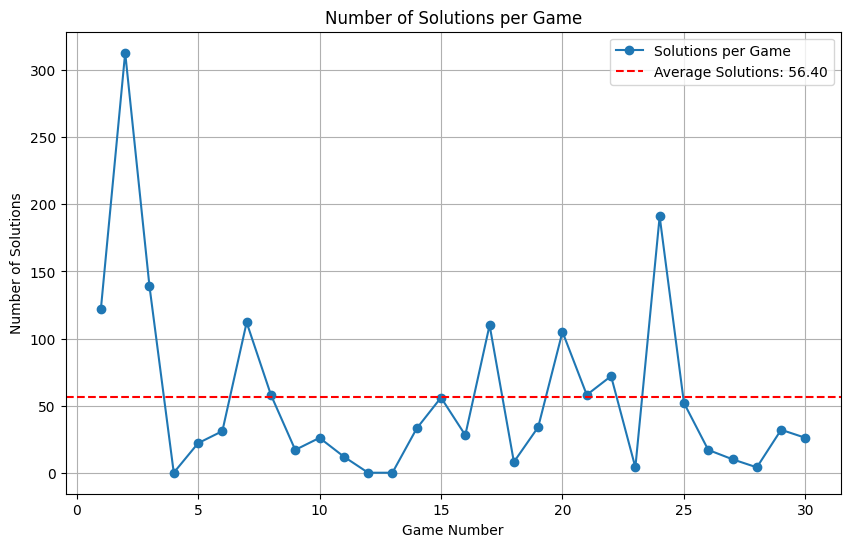

In [73]:
# Plotting the number of solutions and average
plt.figure(figsize=(10, 6))
plt.plot(data['Game Number'], data['Number of Solutions'], marker='o', label='Solutions per Game')
avg_solutions = data['Number of Solutions'].mean()
plt.axhline(y=avg_solutions, color='r', linestyle='--', label=f'Average Solutions: {avg_solutions:.2f}')
plt.title('Number of Solutions per Game')
plt.xlabel('Game Number')
plt.ylabel('Number of Solutions')
plt.legend()
plt.grid(True)
plt.show()

Above, we can see the plotting of the solutions. In the 30 executions, the function failed to find a solution three times, indicating that it has a $90$ percent rate of success in generating a solution across the 30 executions. The highest number of solutions is a huge $313$, for game number 2. The average number of solutions is $56.40$.

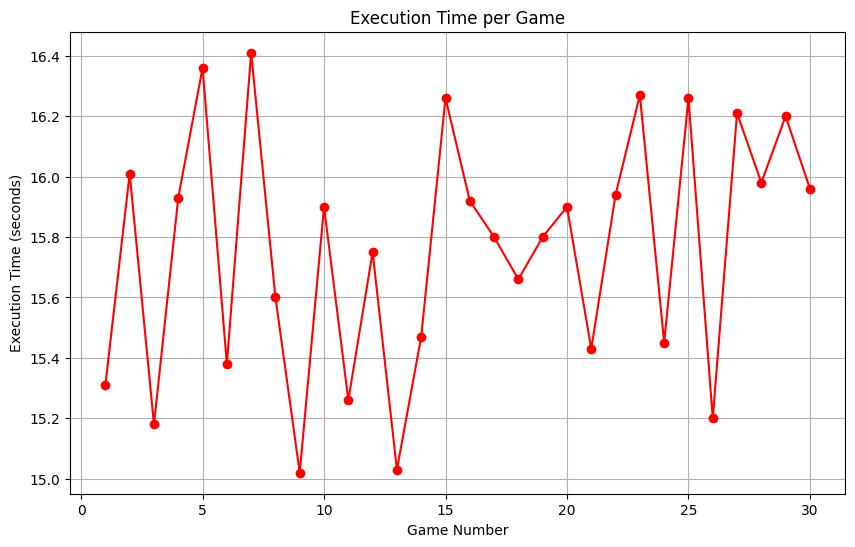

In [74]:
# Plotting execution times
plt.figure(figsize=(10, 6))
plt.plot(data['Game Number'], data['Execution Time'], marker='o', color='red')
plt.title('Execution Time per Game')
plt.xlabel('Game Number')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.show()

Above, we can see the execution time for each game. Interestingly, the variance in execution time is within 2 seconds of eachother across the board, indicating that the execution time isn't significantly impacted by the number of solutions. This is likely due to the function examining and evaluating many potential solutions for each set of numbers, even if there isn't a solution at the end. We can investigate this further below:

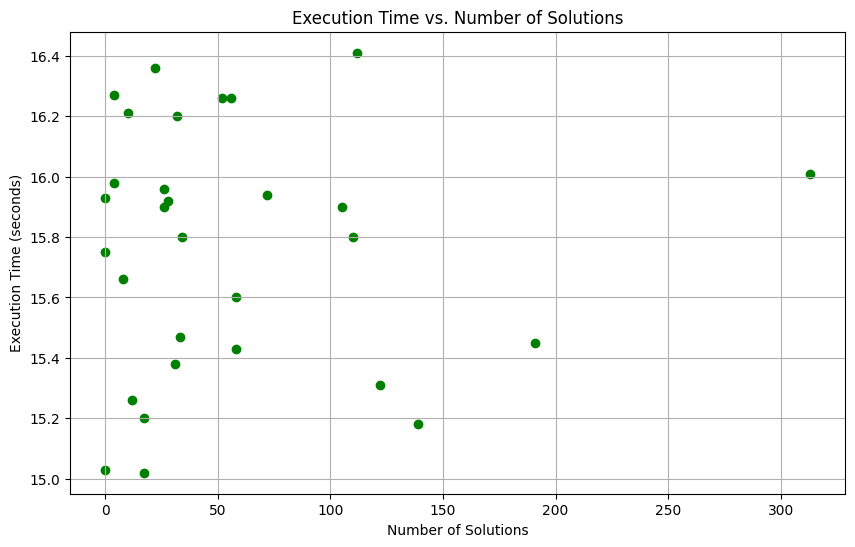

In [75]:
# Scatter plot of execution time vs number of solutions
plt.figure(figsize=(10, 6))
plt.scatter(data['Number of Solutions'], data['Execution Time'], color='green')
plt.title('Execution Time vs. Number of Solutions')
plt.xlabel('Number of Solutions')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.show()

Above we can see a scatter plot of the number of solutions in comparison to the execution time. This plot tells us that despite the number of solutions having a wide array of variance, the execution time remains relatively the same. 

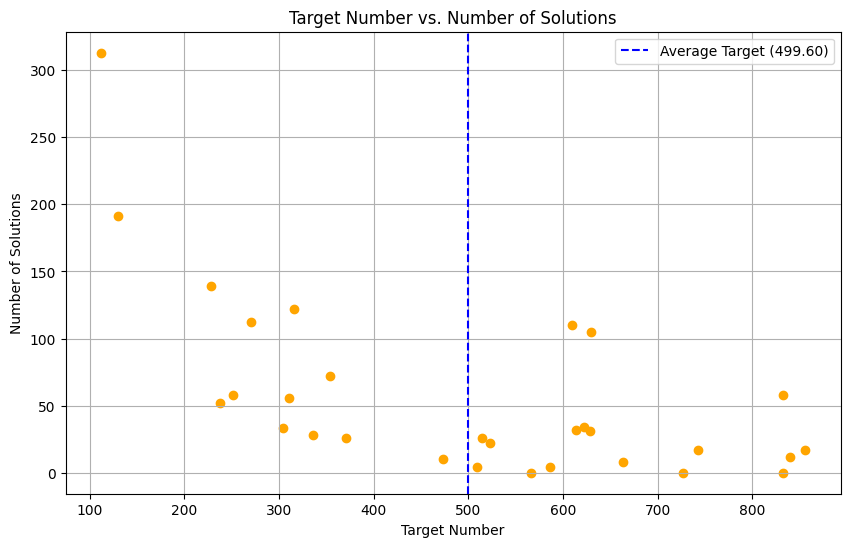

In [78]:
# Calculate the average target number
average_target = np.mean(data['Target Number'])

# Scatter plot of target number vs. number of solutions
plt.figure(figsize=(10, 6))
plt.scatter(data['Target Number'], data['Number of Solutions'], color='orange')
plt.axvline(average_target, color='blue', linestyle='--', label=f'Average Target ({average_target:.2f})')
plt.title('Target Number vs. Number of Solutions')
plt.xlabel('Target Number')
plt.ylabel('Number of Solutions')
plt.legend()  # This adds the legend to the plot
plt.grid(True)
plt.show()

In the scatter plot above, we can make a few interesting observations. There seems to be a slight increase in the number of solutions when the target number is below 500. The average target number across the 30 executions was 499.60, so relatively close to the average between 101 and 999, which is 550. This may indicate that target numbers below 550 were generated more often. Target numbers between 200 and 400 seem to have more solutions on average, but not enough of a difference to justify further investigation. 

#### Examples

- https://www.youtube.com/watch?v=6mCgiaAFCu8 - execute the function with famous 952 game params
- execute function with all low numbers, all lare numbers, generate plot, compare vs previous plots
- generate target numbers with 1 included, as it's the least useful number to have (cant divide, multiply with it)

# Conclusion
***


# References

[1] TTested, "Polish Countdown", TTested, [Online]. Available: https://www.ttested.com/polish-countdown/

[2] Daitx, "Countdown Math", Daitx Blog, May 1, 2016, [Online]. Available: https://www.daitx.com/2016/05/01/countdown-math/

[3] fanclub592, "James Martin 952", [Online]. Available: https://www.youtube.com/watch?v=6mCgiaAFCu8

[4] DataGenetics, "Countdown Game Show", 2014, [Online]. Available: http://datagenetics.com/blog/august32014/index.html

[5] Real Python, "Python Functional Programming", [Online]. Available: https://realpython.com/python-functional-programming/

[6] Python Software Foundation, "Functional Programming HOWTO", Python Documentation, [Online]. Available: https://docs.python.org/3/howto/functional.html

[7] Ian McLoughlin, "Reverse Polish Notation", [Online]. Available: https://ianmcloughlin.github.io/reverse_polish_notation/
